3    6045
1    1754
0    1714
2    1508
Name: count, dtype: int64
4    4396
0    1714
5    1649
3    1508
2    1073
1     681
Name: count, dtype: int64


<Axes: >

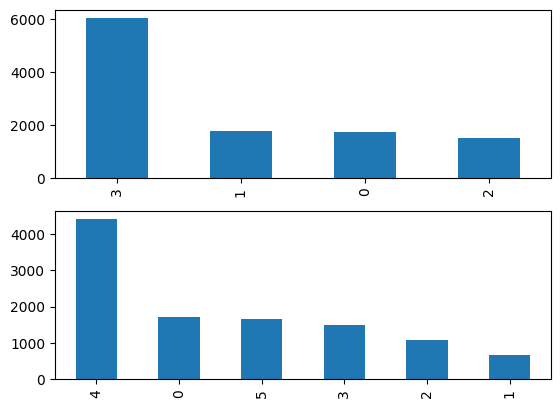

In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pylab import mpl

TARGET = 'food_quality'

# 讀取CSV文件並轉換為DataFrame
df = pd.read_csv('reviewDatasetV1.csv')
df.dropna(inplace=True)
texts = df['Comment'].tolist()

full_labels = []


simple_labels = []


for t in range(len(texts)):

    if(df.iloc[t][TARGET] == 1 or df.iloc[t][TARGET] == 2):
      simple_labels.append(1)
    elif(df.iloc[t][TARGET] == 4 or df.iloc[t][TARGET] == 5):
      simple_labels.append(3)
    elif(df.iloc[t][TARGET] == 3):
      simple_labels.append(2)
    else:
      simple_labels.append(df.iloc[t][TARGET]) 

    full_labels.append(df.iloc[t][TARGET])


fig, axes = plt.subplots(nrows=2, ncols=1)

print(pd.Series(simple_labels).value_counts())
pd.Series(simple_labels).value_counts().plot(kind='bar', ax=axes[0])

print(pd.Series(full_labels).value_counts())
pd.Series(full_labels).value_counts().plot(kind='bar', ax=axes[1])
